In [1]:
%matplotlib inline

import sys 
import os 
import copy 
import numpy as np

nb_dir = os.getcwd()
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from plotlib.loaders import *
from plotlib.plotters import *

from phdconf import config 

ylims=[0.67, 0.45, 0.60, 0.59, 0.38]

In [17]:

emb_names = ['all-paras-lower-100-cbow-minoccur-50', 'all-paras-lower-100-skip-minoccur-50', 'filtered-wiki-news-300d-1M']
models = ['mnzexp', 'maxexp', 'centroid', 'tlm']
folders = ['mnz', 'max', 'centroid', 'tlm']
#rel_level = ['1', '2']

#display_names = ['AUS', 'SIGIR']
#index_names = ['flattened', 'sigir']
#qrel_paths = ['comb-aus.txt', 'comb-sigir.txt']

BASE_DIR = os.path.join(os.environ["HOME"], "phd-generated")

#args = ['trec_eval', '-q', '-m', 'recall.10,100', '-m', 'ndcg', '-m', 'recip_rank', '-l']
#BASE_DIR = '/Users/danlocke/go/src/github.com/dan-locke/phd/experiments/'
#QREL_DIR = '/Users/danlocke/go/src/github.com/dan-locke/phd-data/'
#qrel_dirs = ['aus', 'sigir']

def load_exp_dfs(qrel_path, results_path, run_format, rel_level, emb_names, models, model_dirs, per_query=False, filtered=None):
    dfs = []
    for i, e in enumerate(emb_names):
        temp = []
        for j, m in enumerate(models):
            ltemp = []
            for k in range(1, 21): 
                    ltemp.append(to_trec_df(qrel_path, os.path.join(results_path, model_dirs[j], run_format.format(e, m, k)), rel_level, per_query, filtered))
            temp.append(ltemp)
        dfs.append(temp)

    return dfs 

tlm_dfs = load_exp_dfs(config.AUS_QREL_PATH, os.path.join(BASE_DIR, 'expansion'), 'case-topics-filtered-phrasestop-{0}-{1}-dir-mu-1050.00-neighbours-{2}.run', '1', emb_names, models, folders)

In [3]:
base_res = load_1d_dfs(['filtered-phrasestop'], [config.AUS_QREL_PATH], os.path.join(BASE_DIR, 'preprocessing', 'dirichlet_prior'), 'case-topics-{0}-unigram_dir_mu_{1:.2f}.run', ['1'], 1050.0, 1050.0, 50.0)[0][0]

In [4]:
# def plot_tune_1d_comp(names, metric_names, dfs, start, end, increment, legend_x: float=0.96, legend_y: float=0.46): 

#     r = int(len(metric_names)/2)
#     c = r
#     if c == r: 
#         r-=1
#     if len(metric_names) % 2 != 0:
#         c += 1
#     fig, axs = plt.subplots(r, c)
#     fig.set_size_inches(16, 6)
#     x = np.arange(start, end+increment, increment)
#     cnt = 0 
#     row = 0
#     print(len(x))
#     for m in metric_names:
#             for df in dfs: 
#                 axs[row, cnt].plot(x, [y[m] for y in df])

#             axs[row, cnt].set_ylabel(metric_names[m],fontsize=18)

#             axs[row, cnt].tick_params(labelsize=12)
#             axs[row, cnt].yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
#             cnt += 1 
#             if cnt >= c: 
#                 cnt = 0 
#                 row += 1 
    
#     if len(metric_names) % 2 != 0: 
#         fig.delaxes(axs[row, -1])

#     fig.legend(names, bbox_to_anchor=[legend_x, legend_y], frameon=True, ncol=2, prop={"size": 15}).get_frame().set_edgecolor('black')
        
#     fig.tight_layout()
#     return fig

In [23]:
metrics = copy.copy(config.METRIC_NAMES)
del metrics['recall_100']

comp_fig = plot_tune_1d_comp(['base']+models, metrics, [[base_res for x in range(20)]] + tlm_dfs[1], 1, 20, 1, ylims=ylims, styles=['--'])

20


<Figure size 1152x432 with 6 Axes>

In [16]:
comp_fig.savefig('figures/ausnl-embedding-expansion.pdf')

In [12]:
comp_fig = plot_tune_1d_comp(['base']+models, metrics, [[base_res for x in range(20)]] + [tlm_dfs[0]], 1, 20, 1, legend_y=0.25)

20


TypeError: list indices must be integers or slices, not str

<Figure size 1152x432 with 6 Axes>

In [40]:
#embedding-tuning-runs-filtered-phrasestop-all-paras-lower-100-cbow-minoccur-50-maxexp-dir-mu-1050.00-neighbours-10.run

In [41]:
baseline_res = load_1d_dfs(['case-topics'], [config.AUS_QREL_PATH], os.path.join(BASE_DIR, 'preprocessing', 'dirichlet_prior'), '{0}-unigram_dir_mu_{1:.2f}.run', ['1'], 1050, 1050, 50)

CalledProcessError: Command '['trec_eval', '-q', '-m', 'recall.20,100', '-m', 'ndcg', '-m', 'recip_rank', '-m', 'set_P', '-m', 'set_recall', '-m', 'relstring.20', '-l', '1', '/home/danlocke/go/src/github.com/dan-locke/phd-data/aus/filtered-qrels.txt', '/home/danlocke/phd-generated/preprocessing/dirichlet_prior/case-topics-unigram_dir_mu_1050.00.run']' returned non-zero exit status 2.

0

In [18]:
# def plot_tune_1d(index_names, metric_names, df, start, end, increment): 
#     fig, axs = plt.subplots(len(metric_names), len(index_names), sharex=True)
#     fig.set_size_inches(16, 10)
#     for i in range(len(index_names)):
#         cnt = 0 
#         for j, m in enumerate(df[i][0][0].index):
#             if m in metric_names: 
#                 y = [y[m] for y in df[i][0]]
#                 axs[cnt, i].plot(np.arange(start, end, increment), y)

#                 if i == 0:
#                     axs[cnt, i].set_ylabel(metric_names[m],fontsize=18)

#                 axs[cnt, i].tick_params(labelsize=12)
#                 axs[cnt, i].yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
#                 cnt += 1
                
#         axs[cnt-1, i].set_xlabel(index_names[i], fontsize=20)
        
#     fig.tight_layout()
#     return fig 


tlm_fig = plot_tune_1d(models, config.METRIC_NAMES, tlm_dfs, 1, 20, 1)

IndexError: list index out of range

<Figure size 1152x720 with 7 Axes>

In [72]:
# def plot_tune_comp(index_names, metric_names, names, dfs, start, end, increment): 
#     fig, axs = plt.subplots(len(metric_names), len(index_names), sharex=True)
#     fig.set_size_inches(16, 10)
#     for i in range(len(index_names)):
#         cnt = 0 
#         for j, m in enumerate(dfs[i][0][0][0].index):
#             if m in metric_names: 
#                 y = [[y[m] for y in df[i][0]] for df in dfs]
#                 for l in y: 
#                     axs[cnt, i].plot(np.arange(start, end, increment), l)

#                 if i == 0:
#                     axs[cnt, i].set_ylabel(metric_names[m],fontsize=18)

#                 axs[cnt, i].tick_params(labelsize=12)
#                 axs[cnt, i].yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
                
#                 axs[cnt, i].legend(names)
#                 cnt += 1
                
#         axs[cnt-1, i].set_xlabel(index_names[i], fontsize=20)
        
#     fig.tight_layout()
#     return fig 

# maxexp_dfs = load_1d_dfs(index_names[:1], qrel_paths, os.path.join(BASE_DIR, 'maxexp'), '{0}-{1}-{2}-dir-mu-{3:.2f}-neighbours-{4}.run', rel_level, emb_name, 'maxexp', 2100, 2150, 50)
# maxexp_fig = plot_tune_1d(display_names[:1], metric_names, maxexp_dfs, 1, 11, 1)
dirs = ['tlm', 'maxexp', 'mnzexp', 'centroid']
models = ['tlm', 'maxexp', 'mnzexp', 'centroid']
# dirs = ['mnzexp']
# models = ['mnzexp']
model_res = [load_1d_dfs(index_names[:1], qrel_paths, os.path.join(BASE_DIR, dirs[i]), '{0}-{1}-{2}-dir-mu-{3:.2f}-neighbours-{4}.run', rel_level, emb_names[0], models[i], 2400, 2450, 50) for i in range(len(dirs))]

IndexError: list index out of range

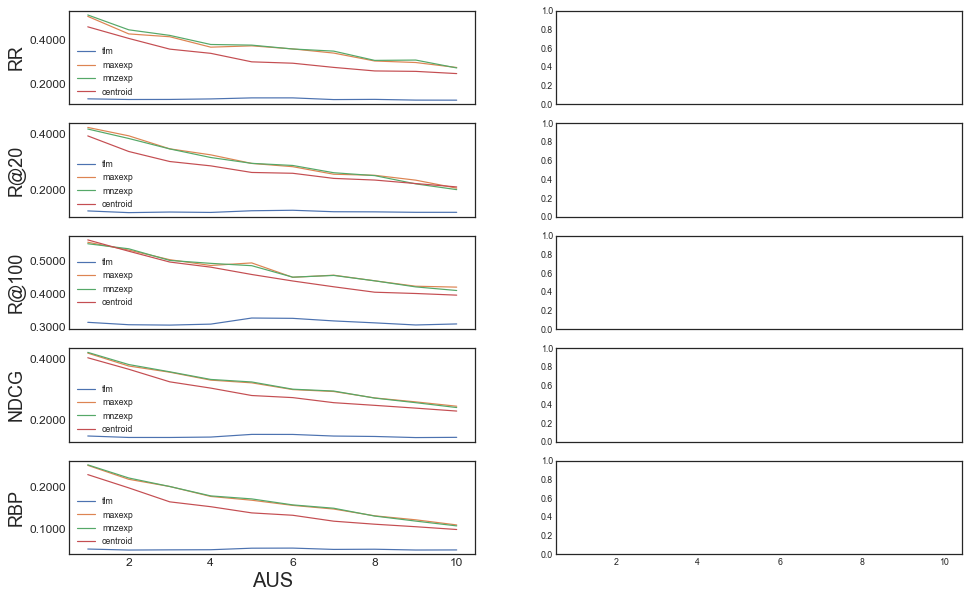

In [73]:
comp_fig = plot_tune_comp(display_names, metric_names, models, model_res, 1, 11, 1)

IndexError: list index out of range

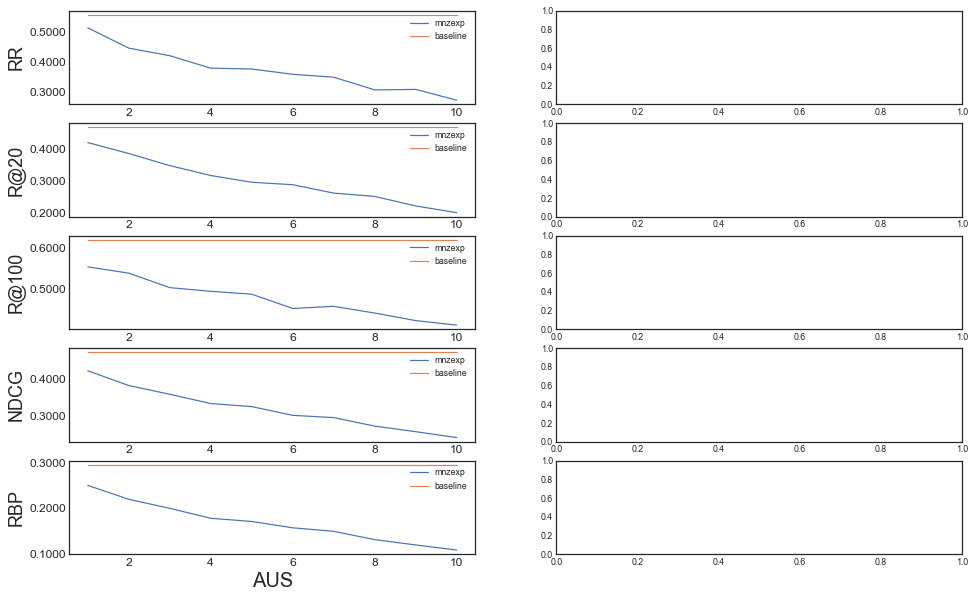

In [9]:
l = 10
comb_base_fig = plot_tune_comp(display_names, metric_names, ['mnzexp', 'baseline'], [model_res[2], [[[ind_res[0] for x in range(l)]] for ind_res in baseline_res]], 1, 11, 1)

In [182]:
print(model)
tlm_query_dfs = load_1d_dfs(index_names[:1], qrel_paths, os.path.join(BASE_DIR, model), '{0}-{1}-{2}-dir-mu-{3:.2f}-neighbours-{4}.run', rel_level, emb_names, model, 2400, 2450, 50, per_query=True)

mnzexp


In [183]:
import json

def load_queries(path: str):  
    queries = {}
    with open(path) as f:
        data = json.load(f)
        for topic in data['topics']:
            queries[topic['id']] = {'topic': topic['topic'], 'type': topic['type']}
    return queries

queries = load_queries('/Users/danlocke/Desktop/case-topics.json')

In [184]:
baseline_query_res = load_regular_1d_dfs(index_names, qrel_paths, os.path.join(BASE_DIR, 'dirichlet_prior'), '{0}-unigram_dir_mu_{1:.2f}.run', rel_level, 2400, 2450, 50, True)

In [185]:
baseline_diff = tlm_query_dfs[0][0][0]-baseline_query_res[0][0]

In [186]:
baseline_diff['type'] = pd.Series({k: queries[k]['type'] for k in baseline_diff.index})

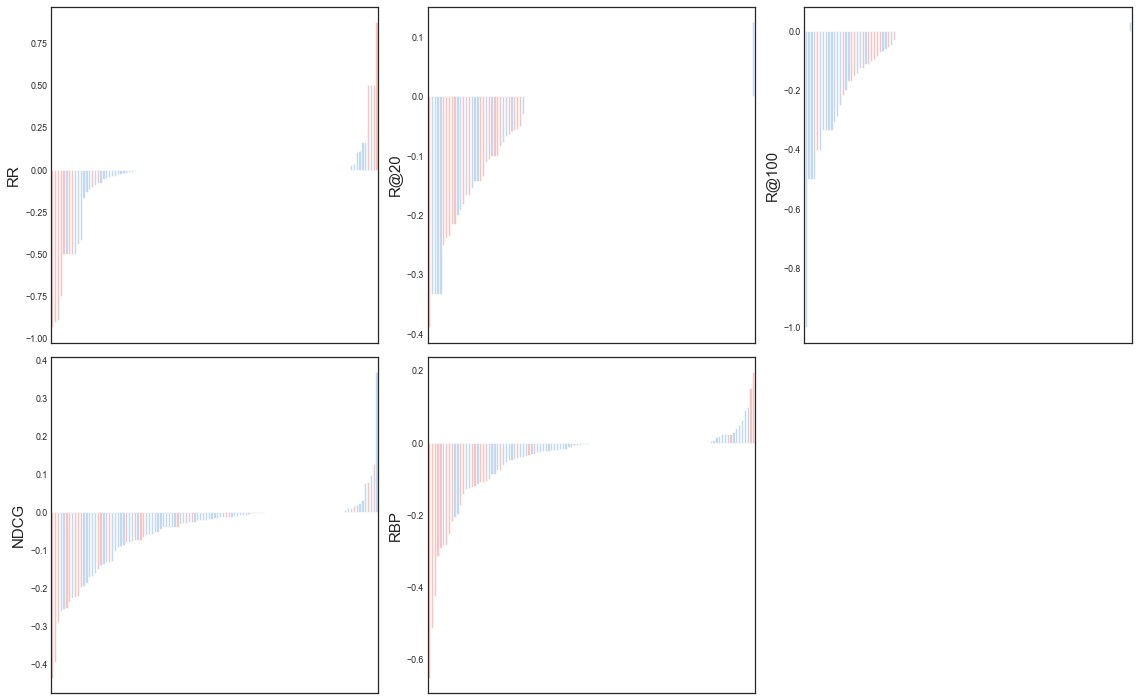

In [188]:
# for k, v in metric_names.items():
#     sort = tlm_query_dfs[0][0][0].sort_values([k], ascending=True)
#     mask = sort['type'] == 'broad'
#     colors = np.array(['b']*len(sort))
#     colors[mask.values] = 'r'
#     fig = plt.figure() 
#     ax = fig.add_subplot(111)
#     fig.set_size_inches(16, 10)
#     g = sns.barplot(x=tlm_query_dfs[0][0][0].index, y=k, data=tlm_query_dfs[0][0][0], order=sort.index, ax=ax, palette=colors, alpha=0.7)
#     g.set_xticklabels([x if sort[k].loc[x] != 0.0 else '' for x in sort.index ])
#     ax.set_ylabel(v, fontsize=15)
#     plt.yticks(size=15)
#     plt.xticks(rotation=90, size=12)
#     fig.tight_layout()
#     break 

def plot_query_change(df, metric_names):
    
    r = int(len(metric_names)/2)
    c = r + 1
    fig, axs = plt.subplots(r, c)
    fig.set_size_inches(16, 10)
    cnt = 0 
    row = 0

    for k, v in metric_names.items():
        sort = df.sort_values([k], ascending=True)
        mask = sort['type'] == 'broad'
        colors = np.array(['b']*len(sort))
        colors[mask.values] = 'r'

        g = sns.barplot(x=tlm_query_dfs[0][0][0].index, y=k, data=df, order=sort.index, ax=axs[row, cnt], palette=colors, alpha=0.7)
#         g.set_xticklabels([x if sort[k].loc[x] != 0.0 else '' for x in sort.index ])
        g.set_xticklabels([])
        axs[row, cnt].set_ylabel(v, fontsize=15)
#         pos = axs[row, cnt].get_position()
#         axs[row, cnt].text(pos.x0+0.1, pos.y1-0.15, 'Broad+ {0}'.format(inc_b), fontsize=12)
#         axs[row, cnt].text(0.15, 0.8, 'Broad- {0}'.format(dec_b), fontsize=12)
        
#         axs[row, cnt].text(0.15, 0.7, 'Specific+ {0}'.format(inc_s), fontsize=12)
#         axs[row, cnt].text(0.15, 0.6, 'Specific- {0}'.format(dec_s), fontsize=12)
#         plt.yticks(size=15)
#         plt.xticks(rotation=90, size=12)
        fig.tight_layout()
        
        cnt += 1 
        if cnt >= c: 
            cnt = 0 
            row += 1 
            
    fig.delaxes(axs[1, 2])
            
plot_query_change(baseline_diff, metric_names)

In [120]:
def make_change_table(df, metric_names):
    tab = {}
    for k, v in metric_names.items():
        increased = df[df[k] > 0]
        inc_b = len(increased[increased['type'] == 'broad'])
        inc_s = len(increased) - inc_b
        tab[('broad', '+', v)] = [inc_b]
        tab[('specific', '+', v)] = [inc_s]
        
        decreased = df[df[k] < 0]
        dec_b = len(decreased[decreased['type'] == 'broad'])
        dec_s = len(decreased) - dec_b
        tab[('broad', '-', v)] = [dec_b]
        tab[('specific', '-', v)] = [dec_s]

    tab_df = pd.DataFrame.from_dict(tab).stack().unstack(level=0).reindex(list(metric_names.values()))
    print(tab_df)
    
make_change_table(tlm_query_dfs[0][0][0], metric_names)

      broad     specific    
          +   -        +   -
          0   0        0   0
RR        3  10        7  21
R@20      0  18        1  16
R@100     0  12        1  20
NDCG      5  22        8  53
RBP       4  22       13  41


In [20]:
# list(tlm_query_dfs[0][0][0][tlm_query_dfs[0][0][0]['ndcg'] > 0].index

In [21]:
manually_expanded = load_regular_1d_dfs(index_names[:1], qrel_paths, os.path.join(BASE_DIR, 'manually-expanded'), '{0}-unigram_dir_mu_{1:.2f}.run', rel_level, 300, 3050, 50)
base_res = load_regular_1d_dfs(index_names[:1], qrel_paths, os.path.join(BASE_DIR, 'dirichlet_prior'), '{0}-unigram_dir_mu_{1:.2f}.run', rel_level, 300, 3050, 50)

manually_query_expanded = load_regular_1d_dfs(index_names[:1], qrel_paths, os.path.join(BASE_DIR, 'manually-expanded'), '{0}-unigram_dir_mu_{1:.2f}.run', rel_level, 300, 3050, 50, True)
base_query_res = load_regular_1d_dfs(index_names[:1], qrel_paths, os.path.join(BASE_DIR, 'dirichlet_prior'), '{0}-unigram_dir_mu_{1:.2f}.run', rel_level, 300, 3050, 50, True)

55


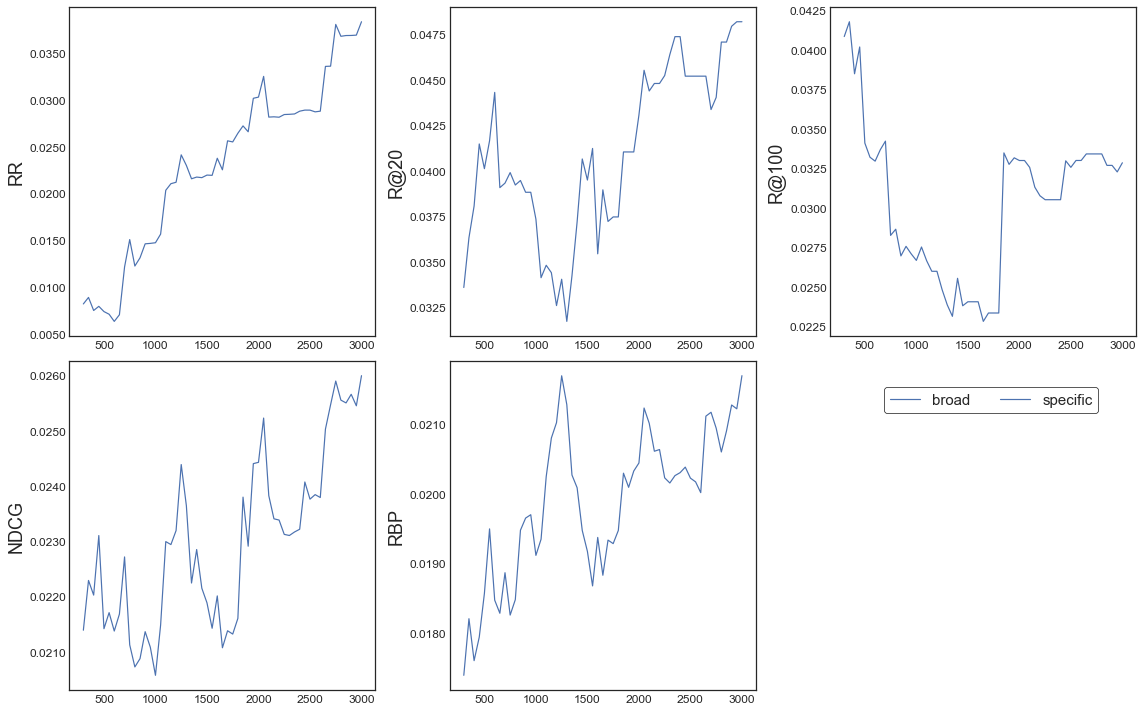

In [22]:
def plot_diff_manual(index_names, metric_names, manual, baseline, start, end, increment): 
    r = int(len(metric_names)/2)
    c = r + 1
    fig, axs = plt.subplots(r, c)
    fig.set_size_inches(16, 10)
    x = np.arange(start, end, increment)
    print(len(x))
    cnt = 0 
    row = 0
    for j, m in enumerate(manual[0].index):
        if m in metric_names: 
            
#             axs[row, cnt].plot(x, [y[m] for y in broad_df[0]])
            axs[row, cnt].plot(x, [y[m]-baseline[k][m] for k, y in enumerate(manual)])
#             axs[row, cnt].legend()

            axs[row, cnt].set_ylabel(metric_names[m],fontsize=18)

            axs[row, cnt].tick_params(labelsize=12)
            axs[row, cnt].yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
            cnt += 1 
            if cnt >= c: 
                cnt = 0 
                row += 1 
    
    fig.delaxes(axs[1, 2])
        
    fig.tight_layout()
    return fig 

diff_maual = plot_diff_manual(index_names, metric_names, manually_expanded[0], base_res[0], 300, 3050, 50)

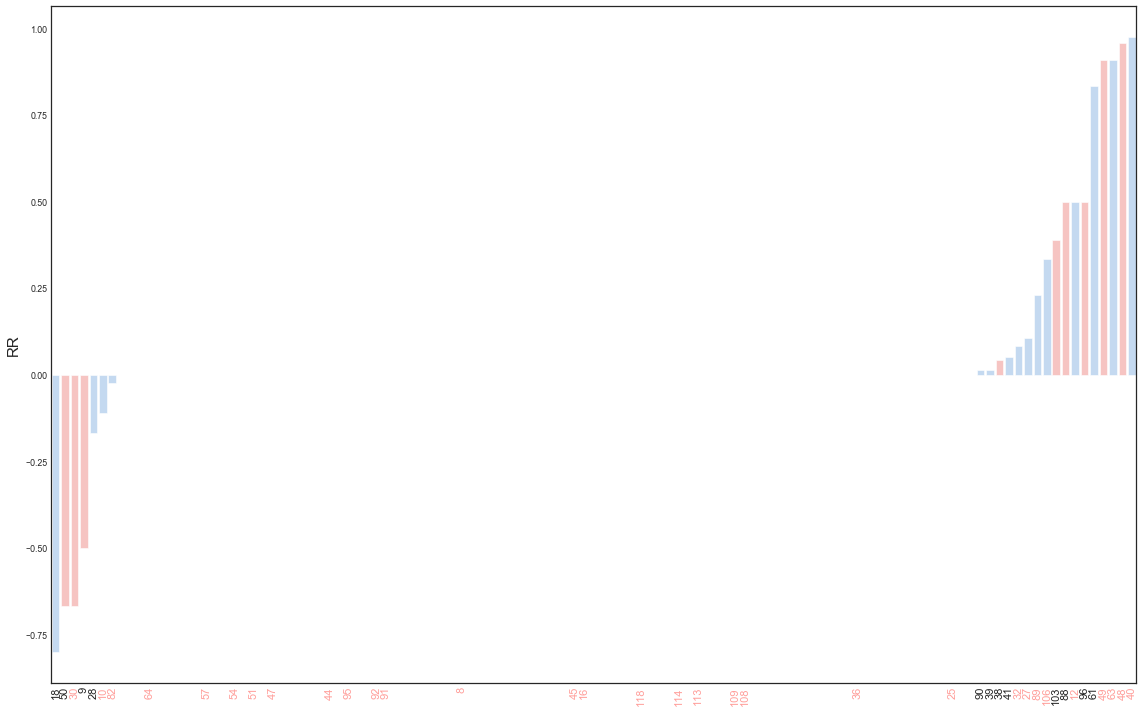

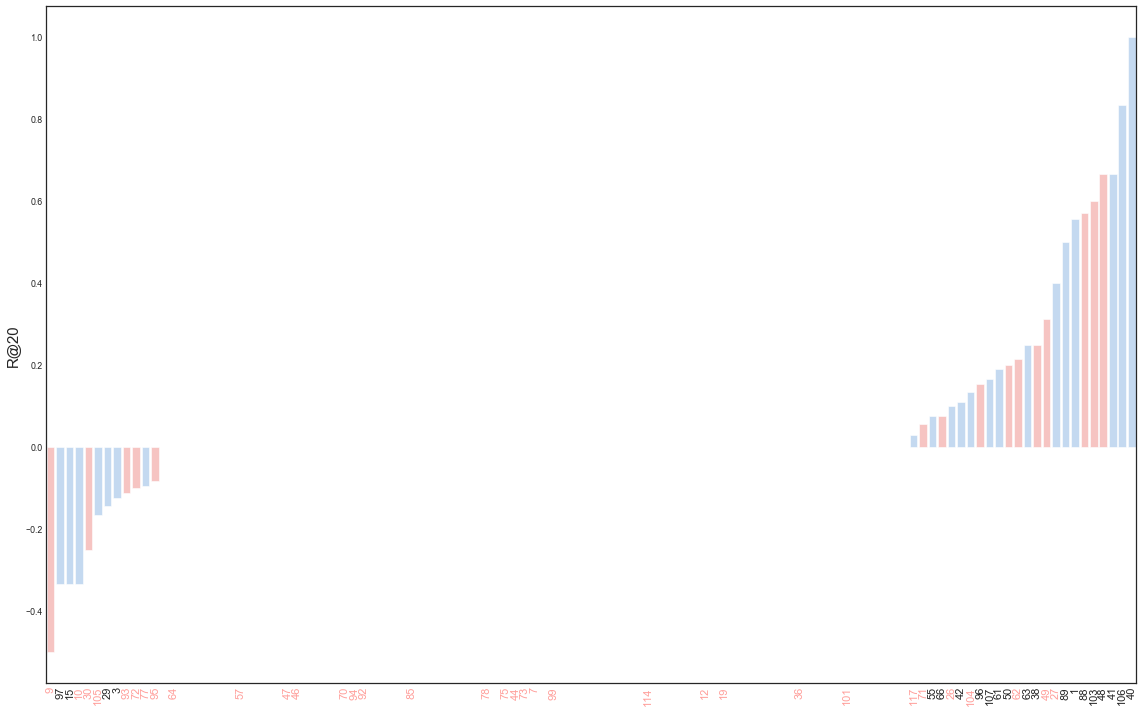

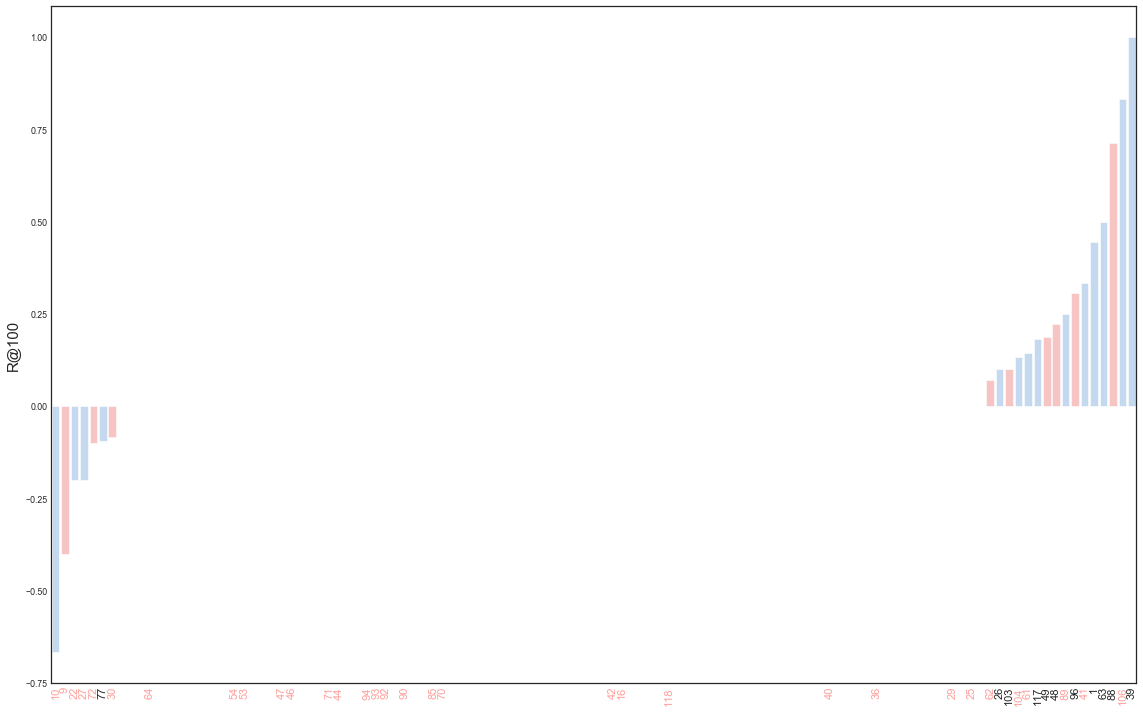

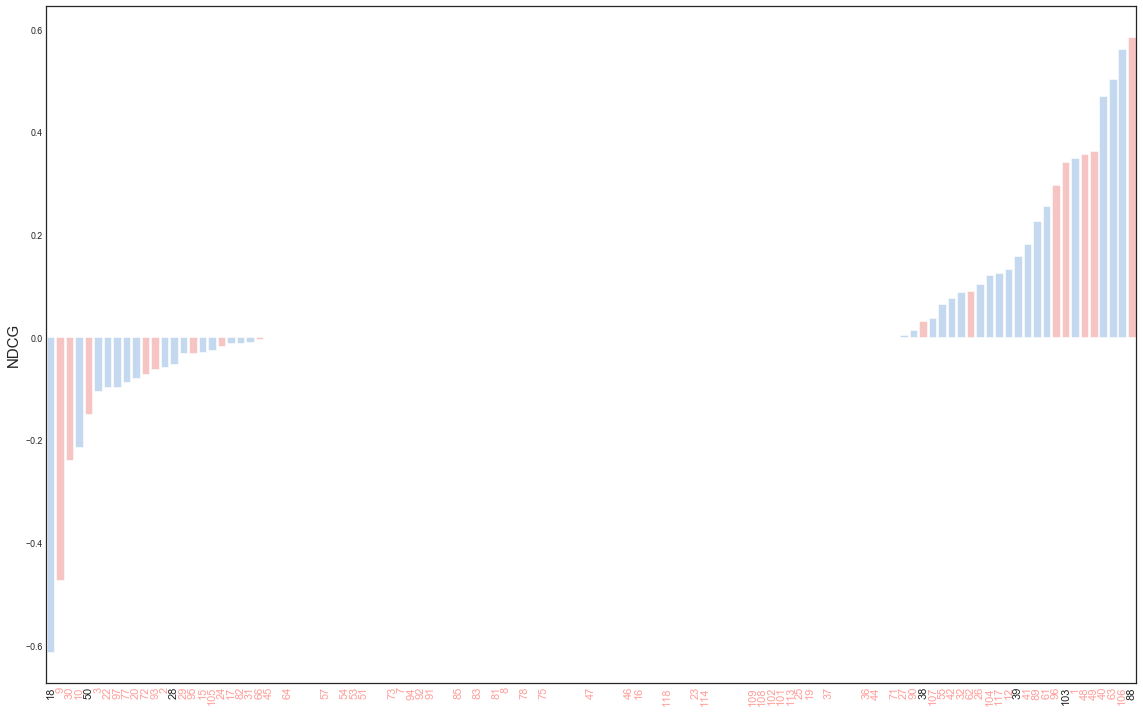

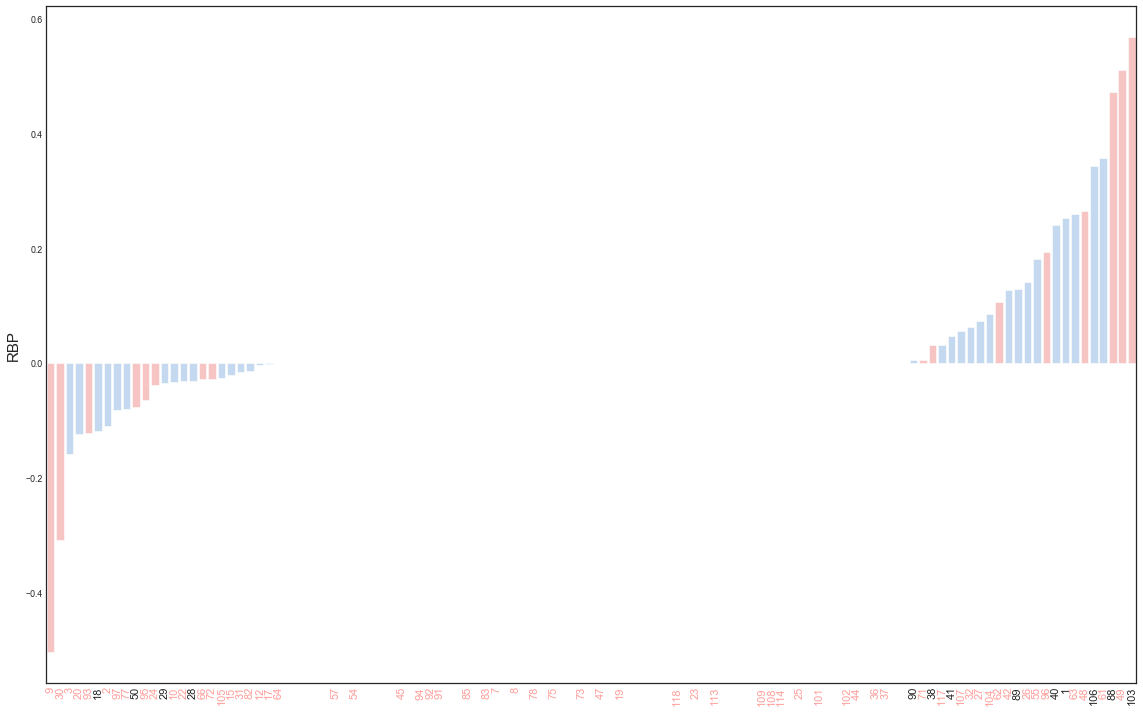

In [189]:
plot_diff_query_ind(manually_query_expanded[0], base_query_res[0], -1, metric_names, queries, baseline_diff)

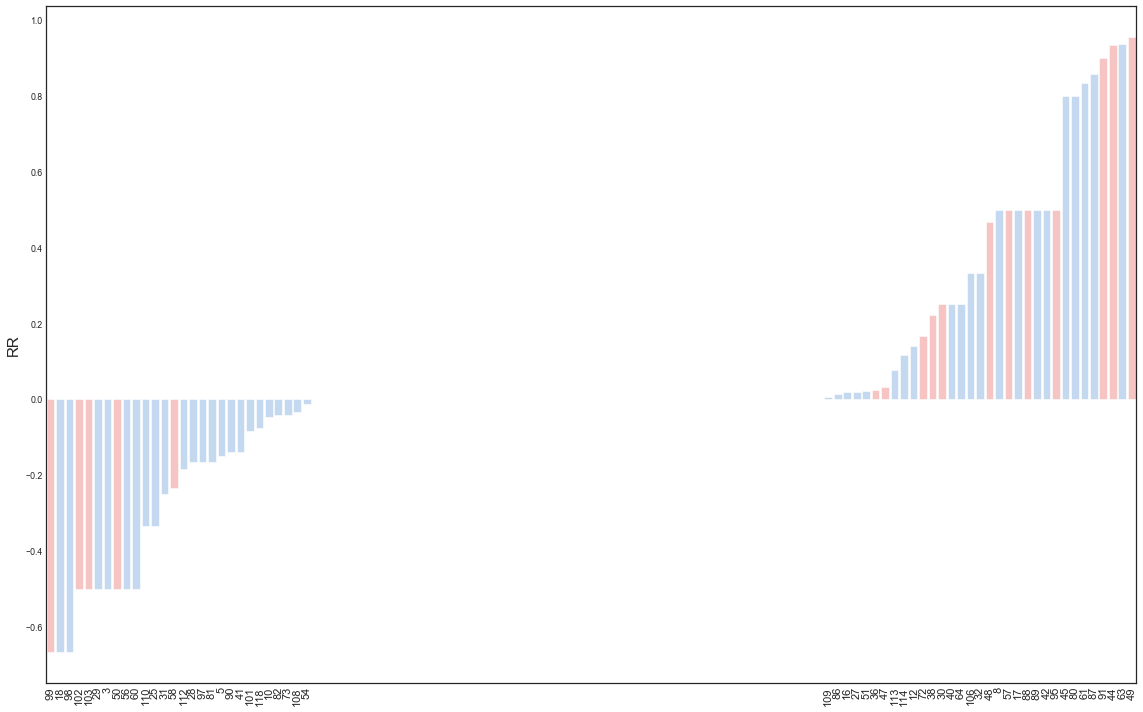

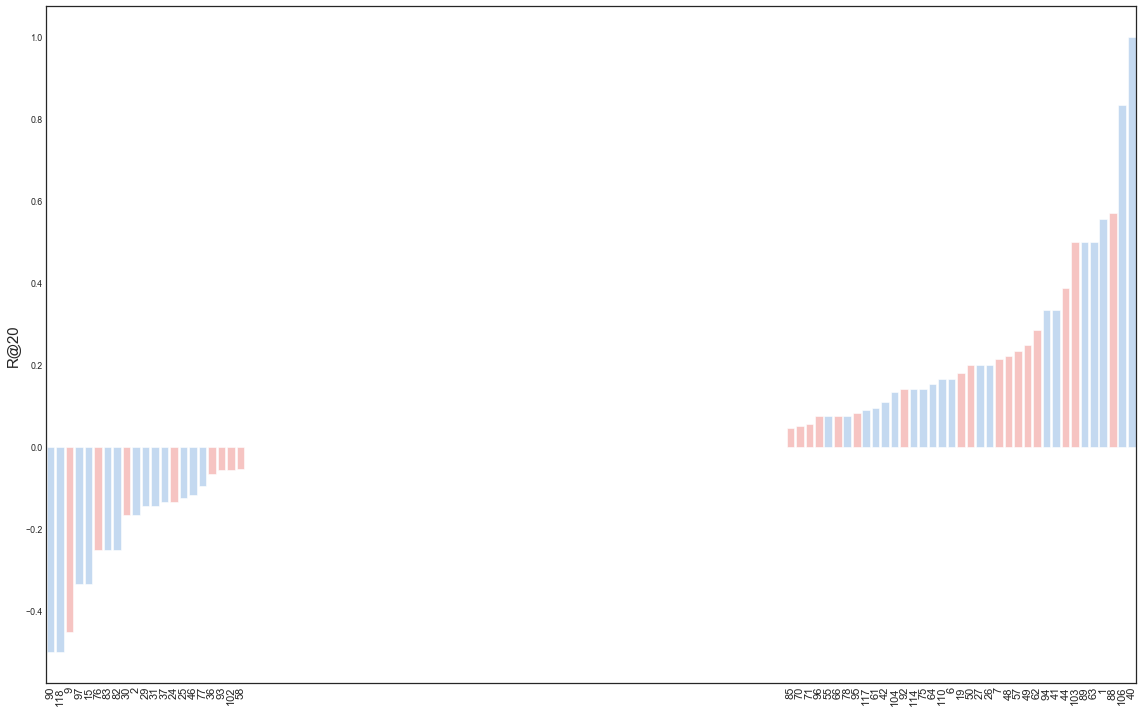

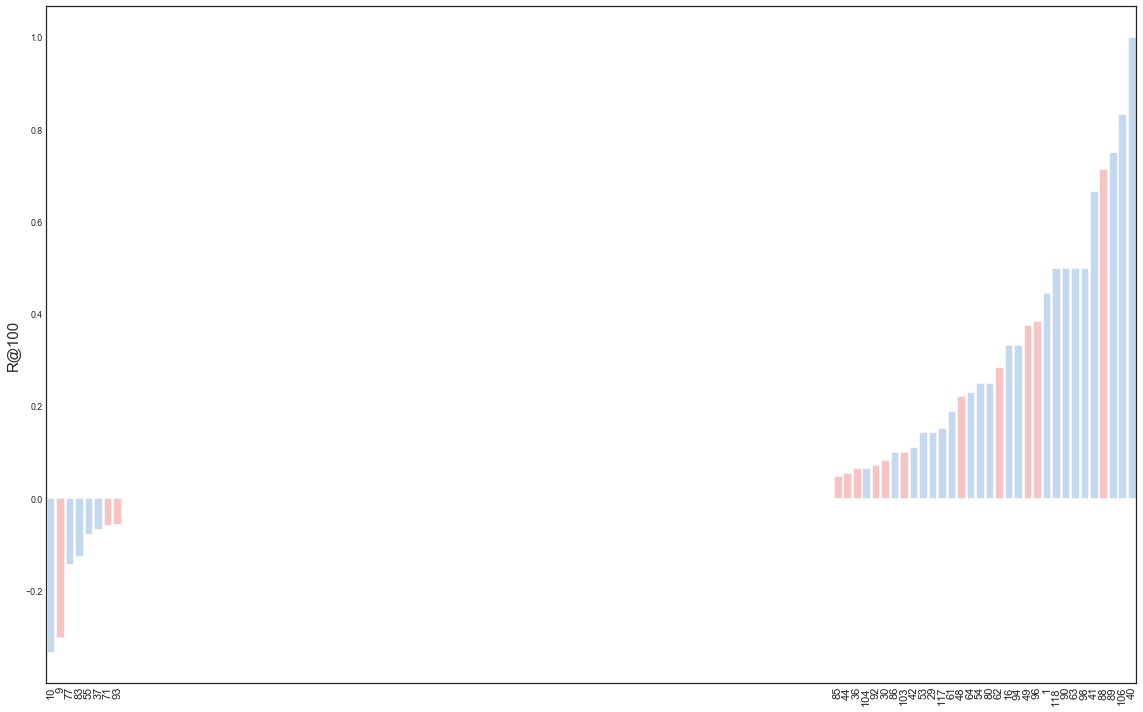

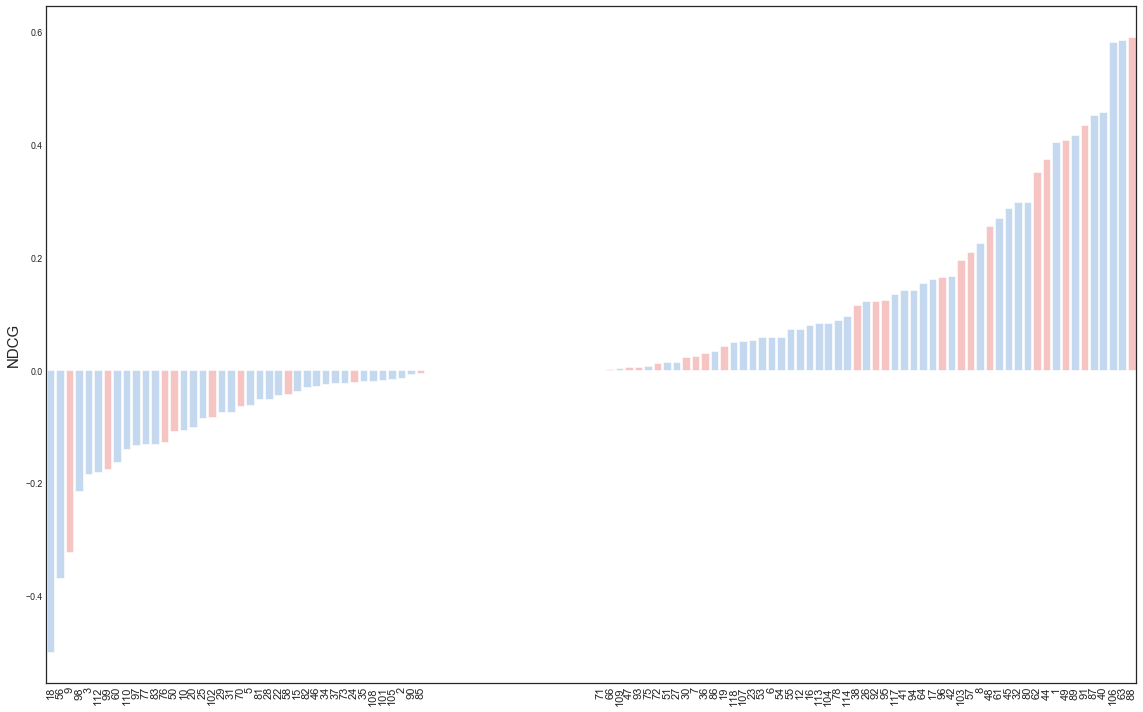

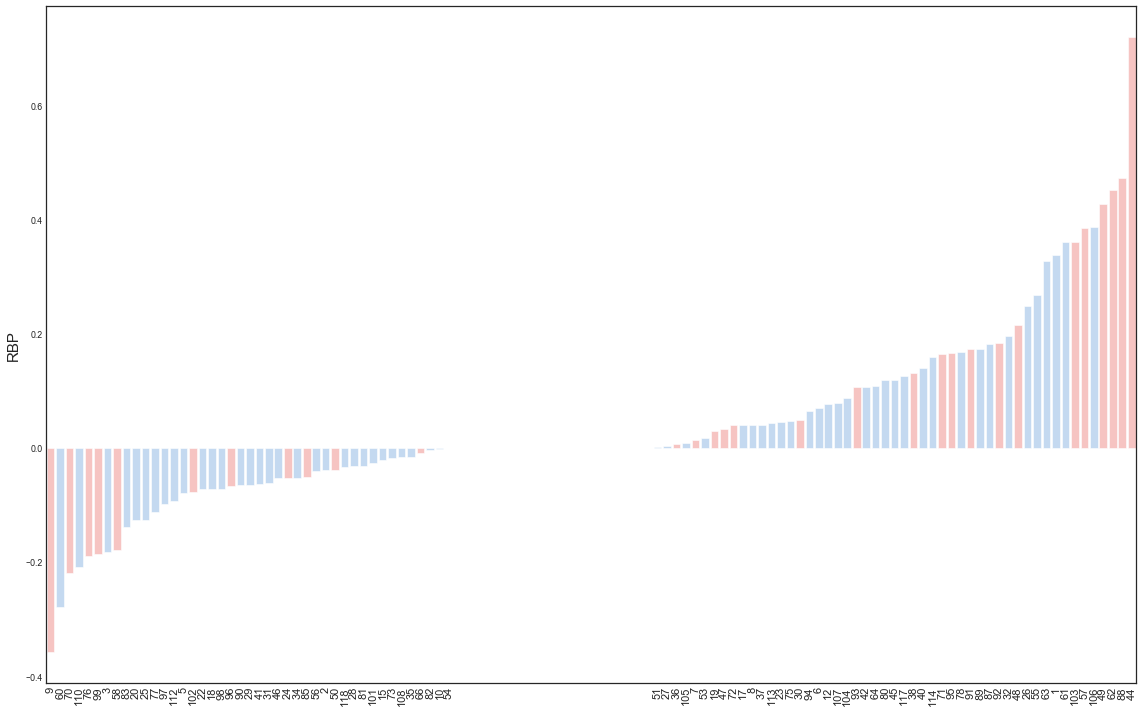

In [191]:
plot_diff_manual_query(manually_query_expanded[0], tlm_query_dfs[0][0], 0, metric_names, queries)

55


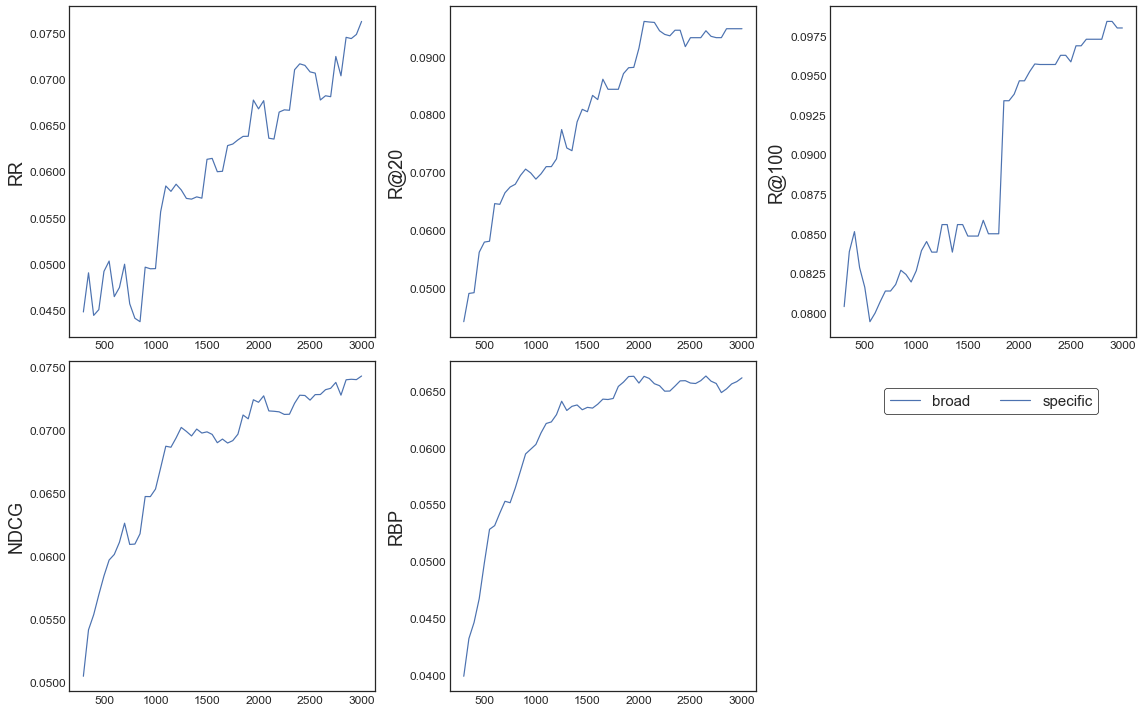

In [214]:
# Plot the difference between the manual expansions and mnz expanded single term queries

tlm_tune_dfs = load_1d_dfs(index_names[:1], qrel_paths, os.path.join(BASE_DIR, model), '{0}-{1}-{2}-dir-mu-{3:.2f}-neighbours-{4}.run', rel_level, emb_names, model, 2400, 2450, 50)

diff_maual_tlm = plot_diff_manual(index_names, metric_names, manually_expanded[0], [tlm_tune_dfs[0][0][0]] * len(manually_expanded[0]), 300, 3050, 50)
